In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from random import randint, randrange
import random

## Data Import

In [33]:
train = pd.read_csv('train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

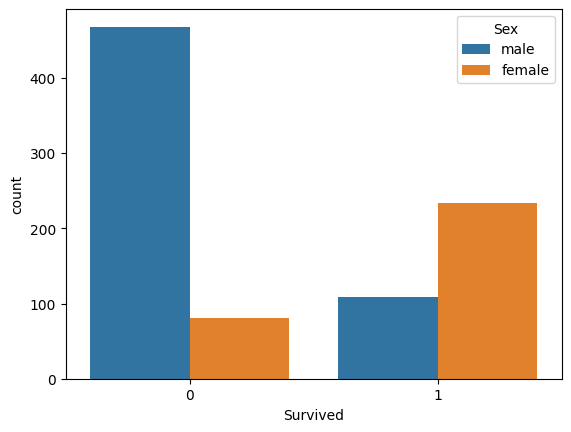

In [8]:
sns.countplot(x = 'Survived',data=train,hue= 'Sex')

<Axes: xlabel='Survived', ylabel='count'>

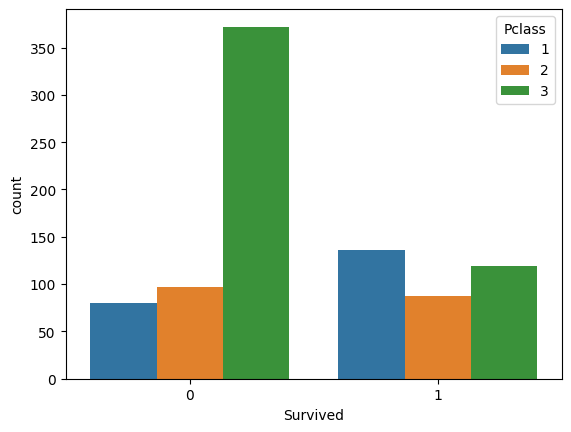

In [9]:
sns.countplot(x = 'Survived',data=train,hue= 'Pclass')

<Axes: >

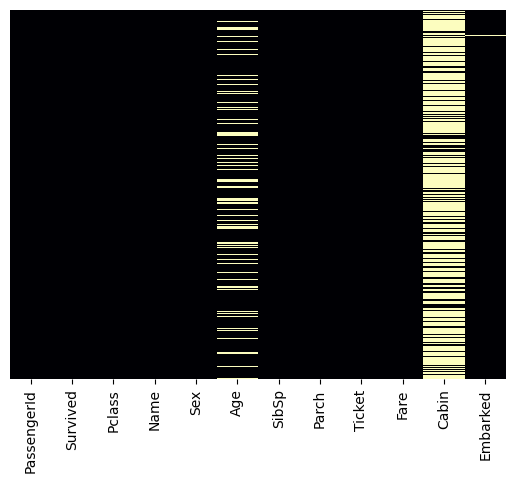

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

<Axes: xlabel='Age', ylabel='Count'>

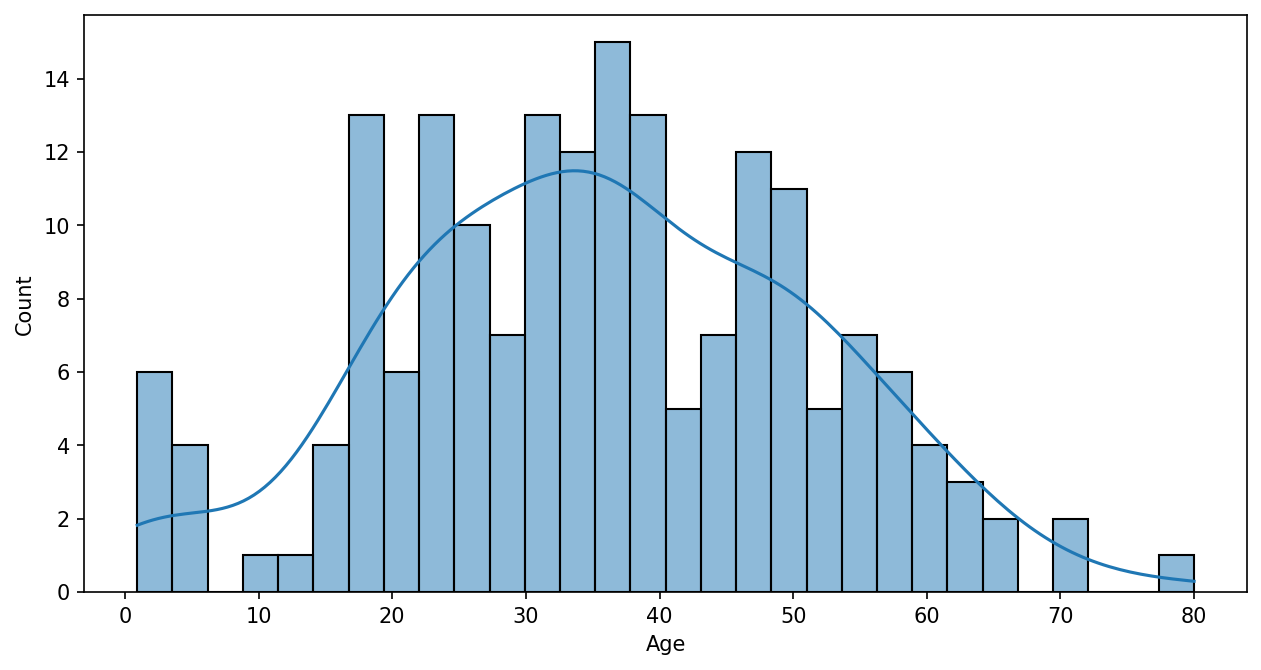

In [11]:
plt.figure(figsize=(10,5),dpi=150)
sns.histplot(data=train.dropna(),x='Age',kde=True,bins=30)

In [12]:
Age = train['Age'].dropna()
Age_mean = Age.mean()
Age_std = Age.std()
print(Age.min(),Age.max())
#fill_age_range
start = int(Age_mean-Age_std)
stop = int(Age_mean+Age_std)
print([start,stop])

0.42 80.0
[15, 44]


Rpws affected 177


<Axes: xlabel='Age', ylabel='Count'>

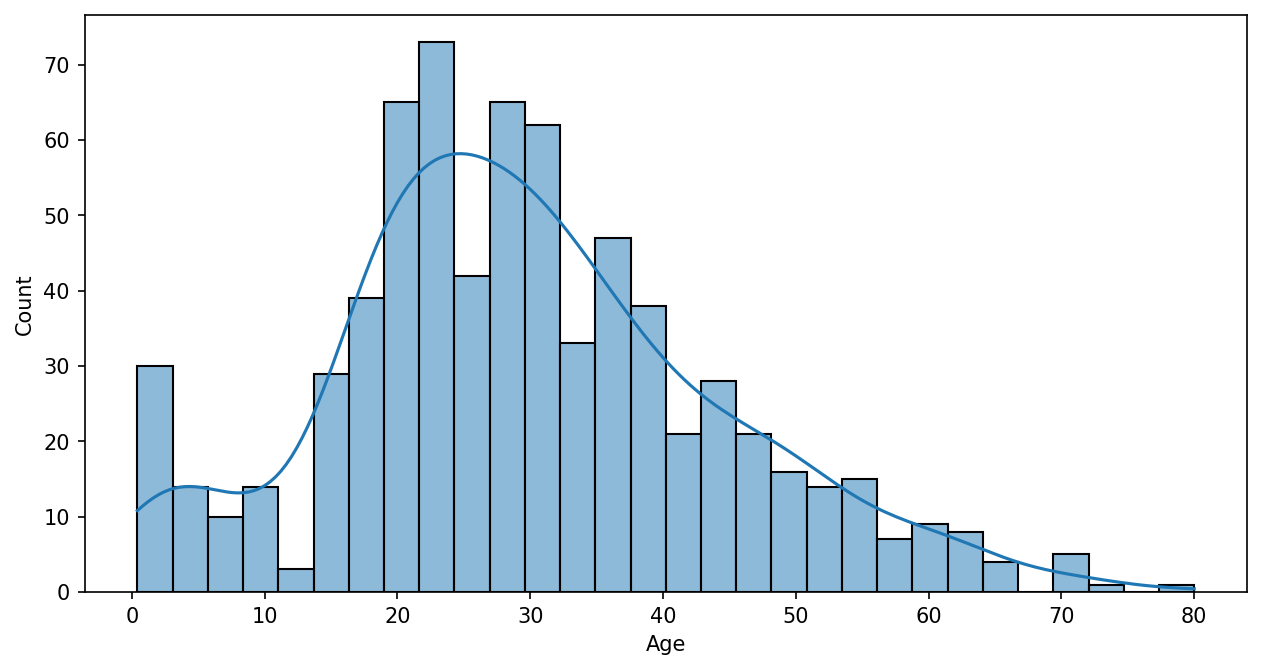

In [13]:
random.seed(123)
x =0
y=0
for i in range(len(train['Age'])):
    if not train['Age'][i] > 0:
        train['Age'][i] = randint(start,stop)
        x+=1
    else:
        pass
print(f'Rpws affected {x}')
plt.figure(figsize=(10,5),dpi=150)
sns.histplot(Age,kde=True,bins=30)

<Axes: >

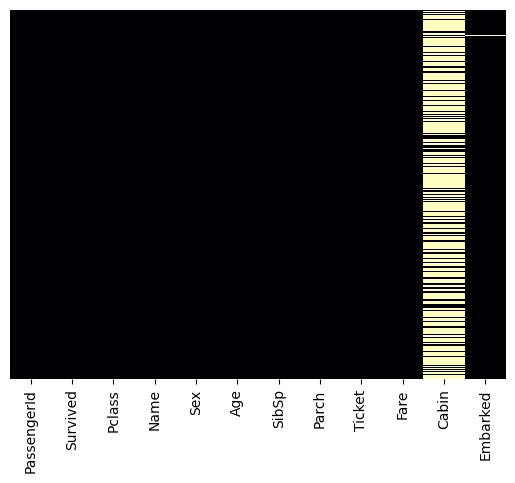

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [15]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
import cufflinks as cf
cf.go_offline()
train['Age'].iplot(kind='hist',bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

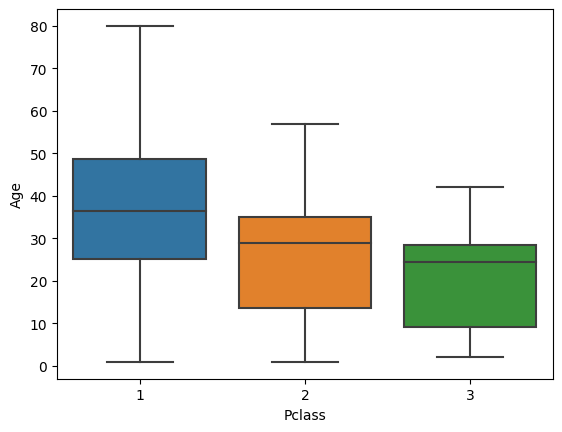

In [44]:
sns.boxplot(data=train.dropna(),y='Age',x='Pclass')

<Axes: xlabel='Sex', ylabel='Age'>

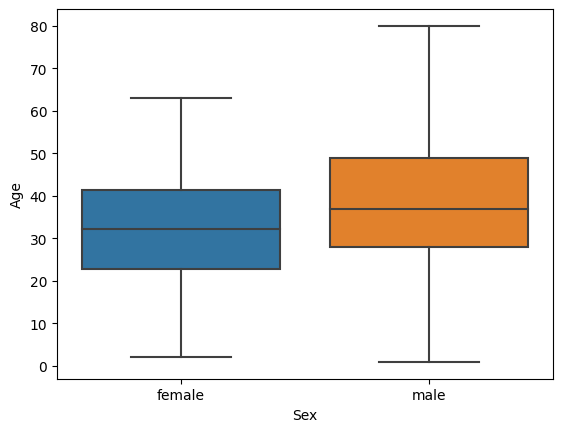

In [40]:
sns.boxplot(data=train.dropna(),y='Age',x='Sex')

In [22]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
